<a href="https://colab.research.google.com/github/hykim-1/Study/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

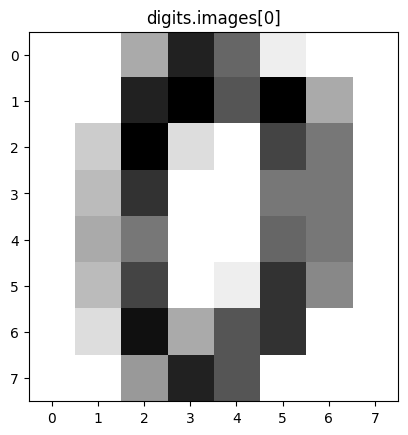

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation='nearest')
plt.title("digits.images[0]")
plt.show()

In [8]:
# ===== 여기서부터 DT / LR / RF 추가 =====
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# 1) 데이터 준비: (n_samples, 8, 8) -> (n_samples, 64)로 평탄화
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [13]:
def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n========== [{name}] ==========")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# 2) 모델 정의
# DT: 스케일링 불필요
dt = DecisionTreeClassifier(
    max_depth=None,           # 과적합 시 10~30 등으로 제한
    random_state=42
)


In [14]:
# LR: 스케일링 권장 -> 파이프라인
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        solver="lbfgs",       # 다중분류 OK
        multi_class="auto"
    ))
])

In [15]:
# RF: 스케일링 불필요
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,           # 과적합 시 제한
    n_jobs=-1,
    random_state=42
)


In [16]:
# 3) 학습 & 평가
evaluate(dt, "Decision Tree (DT)")
evaluate(lr, "Logistic Regression (LR)")
evaluate(rf, "Random Forest (RF)")


========== [Decision Tree (DT)] ==========
Accuracy: 0.8250
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360

Confusion Matrix:
[[35  0  0  0  0  0  0  0  1  0]
 [ 0 26  2  1  1  0  1  1  4  0]
 [ 1  0 28  3  0  1  2  0  0  0]
 [ 0  0  2 30  0  1  1  1  0  2]
 [ 1  0

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



========== [Logistic Regression (LR)] ==========
Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  1  1  0  0  0  2  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 